In [2]:
! pip install keras

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from scipy import io
from skimage.transform import resize
import matplotlib.pyplot as plt

In [4]:
np.random.seed(13)

In [6]:
def load_hoda_digits(training_sample_size=50000, testing_sample_size=10000, size=10):
    dataset = io.loadmat('data/data.mat')
    data = np.squeeze(dataset['Data'])
    labels = np.squeeze(dataset['labels'])
    X_train_orginal = data[:training_sample_size]
    y_train = labels[:training_sample_size]
    X_test_orginal = data[60000-testing_sample_size:]
    y_test = labels[60000-testing_sample_size:]
    plt.imshow(X_train_orginal[13], cmap='gray')
    plt.show()
    print(y_train[13])
    X_train_size_by_size = [resize(img, (size, size)) for img in X_train_orginal]
    X_test_size_by_size = [resize(img, (size, size)) for img in X_test_orginal]
    X_train = [x.reshape(size*size) for x in X_train_size_by_size]
    X_test = [x.reshape(size*size) for x in X_test_size_by_size]
    return X_train, y_train, X_test, y_test

In [24]:
training_sample_size=50000
testing_sample_size=10000
size=10

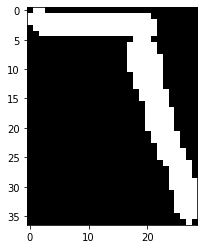

6


In [25]:
X_train, y_train, X_test, y_test = load_hoda_digits(training_sample_size=training_sample_size,
                                                   testing_sample_size=testing_sample_size,
                                                   size=size)

In [26]:
X_train = np.array(X_train)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
X_test = np.array(X_test)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 100)
(50000, 10)
(10000, 100)
(10000, 10)


In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train[13])

[3.3570935e-03 3.2037678e-03 3.1541714e-03 3.1541714e-03 3.1541714e-03
 3.1541714e-03 3.1544406e-03 1.4100346e-03 0.0000000e+00 0.0000000e+00
 6.1164936e-04 1.3049981e-03 1.3248750e-03 1.3248750e-03 1.3248750e-03
 1.5683583e-03 3.5896576e-03 1.9640522e-03 1.3071896e-06 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.8446756e-06 3.8446756e-06 3.8446756e-06
 5.4901961e-04 3.7018454e-03 3.2641292e-03 1.2418300e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0584391e-04 2.8211842e-03 3.5653596e-03 3.5151865e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.1853138e-04 3.7627835e-03 1.5742022e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.7108804e-04 3.4825068e-03 2.8431374e-03 6.6474429e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.0453672e-05 1.7804691e-03 3.6778164e-03 7.9930801e-04
 0.000

In [47]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=size*size))
model.add(Dense(256, activation='relu', input_dim=size*size))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 25,674
Trainable params: 25,674
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.5735 - accuracy: 0.4938 - val_loss: 0.8848 - val_accuracy: 0.7674
Epoch 2/100
40000/40000 [==============================] - 2s 58us/step - loss: 0.7083 - accuracy: 0.7830 - val_loss: 0.5187 - val_accuracy: 0.8397
Epoch 3/100
40000/40000 [==============================] - 2s 58us/step - loss: 0.4842 - accuracy: 0.8510 - val_loss: 0.3831 - val_accuracy: 0.8820
Epoch 4/100
40000/40000 [==============================] - 2s 59us/step - loss: 0.3866 - accuracy: 0.8799 - val_loss: 0.3219 - val_accuracy: 0.8997
Epoch 5/100
40000/40000 [==============================] - 2s 61us/step - loss: 0.3307 - accuracy: 0.8982 - val_loss: 0.2849 - val_accuracy: 0.9122
Epoch 6/100
40000/40000 [==============================] - 2s 60us/step - loss: 0.2947 - accuracy: 0.9103 - val_loss: 0.2490 - val_accuracy: 0.9260
Epoch 7/100
40000/40000 [==============================] - 2s 

Epoch 56/100
40000/40000 [==============================] - 3s 64us/step - loss: 0.0546 - accuracy: 0.9844 - val_loss: 0.0717 - val_accuracy: 0.9791
Epoch 57/100
40000/40000 [==============================] - 3s 66us/step - loss: 0.0555 - accuracy: 0.9847 - val_loss: 0.0687 - val_accuracy: 0.9819
Epoch 58/100
40000/40000 [==============================] - 3s 67us/step - loss: 0.0540 - accuracy: 0.9848 - val_loss: 0.0740 - val_accuracy: 0.9791
Epoch 59/100
40000/40000 [==============================] - 2s 61us/step - loss: 0.0538 - accuracy: 0.9845 - val_loss: 0.0719 - val_accuracy: 0.9801
Epoch 60/100
40000/40000 [==============================] - 2s 60us/step - loss: 0.0537 - accuracy: 0.9849 - val_loss: 0.0686 - val_accuracy: 0.9807
Epoch 61/100
40000/40000 [==============================] - 3s 64us/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 0.0739 - val_accuracy: 0.9813
Epoch 62/100
40000/40000 [==============================] - 3s 67us/step - loss: 0.0530 - accuracy: 0.9851

In [50]:
loss, acc = model.evaluate(X_train, y_train)
print(loss, acc)

50000/50000 [==============================] - 3s 55us/step
0.039116427920332646 0.989080011844635


In [51]:
loss, acc = model.evaluate(X_test, y_test)
print(loss, acc)

10000/10000 [==============================] - 1s 58us/step
0.07562215916919522 0.9829000234603882


In [52]:
predicted_classes = model.predict_classes(X_test)
print(y_test[13])
print(predicted_classes[13])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


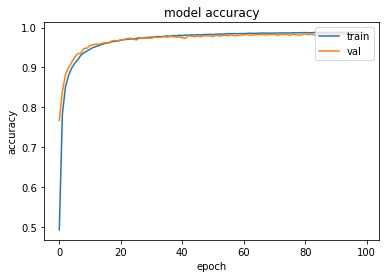

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

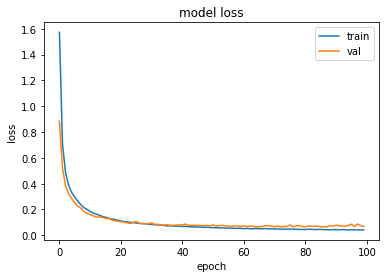

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()